## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df=pd.merge(study_results,mouse_metadata, on="Mouse ID")
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
## Checking the number of mice in the DataFrame.
number_of_mice=len(combined_df["Mouse ID"].unique())
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates=combined_df["Mouse ID"].duplicated()
duplicated_mouse_ID =combined_df.loc[duplicates==True,["Mouse ID","Timepoint"]]
duplicated_mouse_ID

,Mouse ID,Timepoint
1,b128,5
2,b128,10
3,b128,15
4,b128,20
5,b128,25
...,...,...
1888,m601,25
1889,m601,30
1890,m601,35
1891,m601,40


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_df=combined_df.loc[duplicates==True,:]
duplicated_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset="Mouse ID", keep='last')
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
10,f932,0,45.000000,0,Ketapril,Male,15,29
18,g107,35,71.905117,0,Ketapril,Female,2,29
21,a457,10,49.783419,0,Ketapril,Female,11,30
30,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1857,t565,45,34.455298,0,Capomulin,Female,20,17
1867,i557,45,47.685963,1,Capomulin,Female,1,24
1877,m957,45,33.329098,1,Capomulin,Female,3,19
1882,f966,20,30.485985,0,Capomulin,Male,16,17


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean_df=len(clean_df["Mouse ID"])
number_mice_clean_df

249

# Summary Statistics

In [7]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
## This method is the most straighforward, creating multiple series and putting them all together at the end.

#Group data by each drug regimen 
regimen_group_df = combined_df.groupby(by="Drug Regimen")

#Calculate the mean, variance, standard deviation and standard error of tumor volume for each drug regimen
tumor_volume_mean=regimen_group_df["Tumor Volume (mm3)"].mean()
tumor_volume_var=regimen_group_df["Tumor Volume (mm3)"].var()
tumor_volume_std=regimen_group_df["Tumor Volume (mm3)"].std()
tumor_volume_sem=regimen_group_df["Tumor Volume (mm3)"].sem()

In [8]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Create a dataframe
summary_statistics=pd.DataFrame({
    "Mean":tumor_volume_mean,
    "Variance":tumor_volume_var,
    "Standard Deviation":tumor_volume_std,
    "Standard Error":tumor_volume_sem
})

#Format the numbers to two decimal points
summary_statistics = round(summary_statistics[["Mean","Variance","Standard Deviation","Standard Error"]],2)
summary_statistics

,Mean,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,
Capomulin,40.68,24.95,4.99,0.33
Ceftamin,52.59,39.29,6.27,0.47
Infubinol,52.88,43.13,6.57,0.49
Ketapril,55.24,68.55,8.28,0.60
Naftisol,54.33,66.17,8.13,0.60
Placebo,54.03,61.17,7.82,0.58
Propriva,52.32,42.35,6.51,0.51
Ramicane,40.22,23.49,4.85,0.32
Stelasyn,54.23,59.45,7.71,0.57


## Bar Plots

In [9]:
##Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

#Filter two columns from the dataframe
mouse_timepoint_df = combined_df[["Timepoint","Mouse ID"]]

#Rename the column "Mouse ID" to "Mouse Count"
mouse_timepoint_df=mouse_timepoint_df.rename(columns={"Mouse ID":"Mouse Count"})

#Group data by timepoint
mouse_timepoint_df = mouse_timepoint_df.groupby(["Timepoint"]).count().reset_index()
mouse_timepoint_df

,Timepoint,Mouse Count
0,0,250
1,5,238
2,10,223
3,15,207
4,20,195
5,25,183
6,30,171
7,35,154
8,40,142
9,45,130


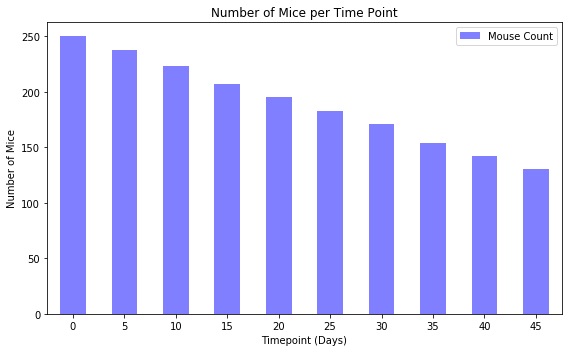

In [10]:
#Plot the bar chart showing number of mice per timepoint using dataframe.plot()
mouse_timepoint_df.plot(x="Timepoint",y="Mouse Count", kind="bar",\
                        title="Number of Mice per Time Point",legend=True,\
                        width=0.5, figsize=(8,5), color="blue", alpha=0.5,rot=0)

#Set the title and labels
plt.xlabel("Timepoint (Days)")
plt.ylabel("Number of Mice")

#Save the figure
plt.savefig("figures/bar_chart1.png")

#Display the chart
plt.tight_layout()
plt.show()

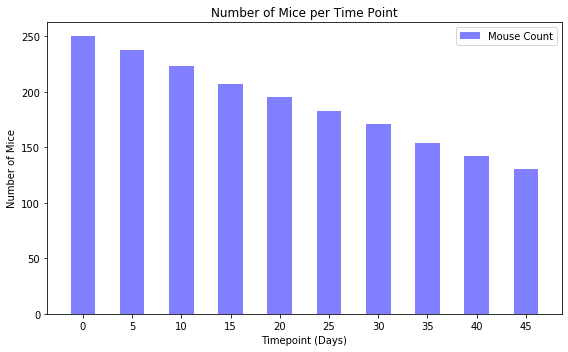

In [11]:
## Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#Plot the bar chart showing number of mice per timepoint using pyplot.bar()
plt.figure(figsize=(8,5))
plt.bar(mouse_timepoint_df["Timepoint"],mouse_timepoint_df["Mouse Count"],\
        align='center', width=2.5, color="blue", alpha=0.5)

#Set the title and labels
plt.xlabel("Timepoint (Days)")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Time Point")
plt.xticks(range(0,50,5))
plt.legend(["Mouse Count"], loc='best')

#Save the figure
plt.savefig("figures/bar_chart2.png")

#Display the chart
plt.tight_layout()
plt.show()

## Pie Plots

In [12]:
## Generate a pie plot showing the distribution of female versus male mice using pandas

#Group data by gender, count number of data in each group
gender_group = combined_df[["Mouse ID", "Sex"]].groupby(by="Sex").count()
gender_group = gender_group.rename(columns={"Mouse ID":"Mouse Count"})
gender_group

,Mouse Count
Sex,
Female,935
Male,958


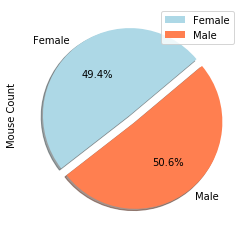

In [13]:
#Plot the pie chart using dataframe.plot()
gender_group.plot(kind="pie", y="Mouse Count",explode=(0,0.1),autopct='%1.1f%%',\
                  startangle=40, shadow=True, colors=["lightblue","coral"])

#Save the figure
plt.savefig("figures/pie_chart1.png")

#Display the chart
plt.show()

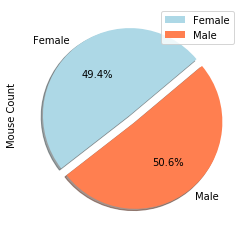

In [14]:
## Generate a pie plot showing the distribution of female versus male mice using pyplot

#Set the parameters
labels = 'Female','Male'
sizes = gender_group["Mouse Count"].tolist()
explode = (0, 0.1)

#Plot the pie chart using pyplot.pie()
plt.pie(sizes,explode=explode,labels=labels, autopct='%1.1f%%',\
        startangle=40, shadow=True, colors=["lightblue","coral"])
plt.legend(loc='best')
plt.ylabel("Mouse Count")

plt.savefig("figures/pie_chart2.png")

#Display the chart
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
## Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

#Set the list of four most promising drug regimens
promising_regimens=['Capomulin','Ramicane','Infubinol','Ceftamin']

#Use the clean_df which contains the final data
#Filter rows that contains four most promising regimens
#Filter 3 columns 
promising_regimens_df = clean_df.loc[(clean_df["Drug Regimen"].isin(promising_regimens)),["Mouse ID","Tumor Volume (mm3)","Drug Regimen"]]

promising_regimens_df.head()

,Mouse ID,Tumor Volume (mm3),Drug Regimen
9,b128,38.982878,Capomulin
214,c326,36.321346,Infubinol
224,c139,72.226731,Infubinol
226,v339,46.250112,Infubinol
233,a577,57.031862,Infubinol


In [16]:
## Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Loop through 4 regimens
for drug in promising_regimens:
    #Calculate the quartile of the tumor volume
    tumor_volume = promising_regimens_df.loc[promising_regimens_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    quartile = tumor_volume.quantile([.25,.5,.75])
    #Determine the lower and upper quartile, and interquartile range
    lowerq=quartile[.25]
    upperq=quartile[.75]
    iqr=upperq-lowerq
    #Determine the lower and upper bound
    lowerbound=lowerq-iqr*1.5
    upperbound=upperq+iqr*1.5
    
    #Creat an empty list of outliers
    outlier=[]
    #Loop through the tumor volumes
    for i in tumor_volume:
        #Check if there's any outlier
        #If there's an outlier, then add it to the outliers list
        if i<lowerbound or i>upperbound:
            outlier.append(round(i,2))
    
    print(f"Lower quartile of {drug} is {round(lowerq,2)}.")
    print(f"Upper quartile of {drug} is {round(upperq,2)}.")
    print(f"Interquartile range of {drug} is {round(iqr,2)}.")
    print(f"Values less than {round(lowerbound,2)} can be outliers.")
    print(f"Values greater than {round(upperbound,2)} can be outliers.")
    
    #Check if the outlier list is empty
    if not outlier:
        print(f"{drug} has no outlier.") #if the outlier list is empty
    else: 
        print(f"The outliers of {drug} are {outlier}.") #if there's any outlier
    
    print("---------------------------------------------------")
    
    outlier.clear()


Lower quartile of Capomulin is 32.38.
Upper quartile of Capomulin is 40.16.
Interquartile range of Capomulin is 7.78.
Values less than 20.7 can be outliers.
Values greater than 51.83 can be outliers.
Capomulin has no outlier.
---------------------------------------------------
Lower quartile of Ramicane is 31.56.
Upper quartile of Ramicane is 40.66.
Interquartile range of Ramicane is 9.1.
Values less than 17.91 can be outliers.
Values greater than 54.31 can be outliers.
Ramicane has no outlier.
---------------------------------------------------
Lower quartile of Infubinol is 54.05.
Upper quartile of Infubinol is 65.53.
Interquartile range of Infubinol is 11.48.
Values less than 36.83 can be outliers.
Values greater than 82.74 can be outliers.
The outliers of Infubinol are [36.32].
---------------------------------------------------
Lower quartile of Ceftamin is 48.72.
Upper quartile of Ceftamin is 64.3.
Interquartile range of Ceftamin is 15.58.
Values less than 25.36 can be outliers.


In [17]:
## Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Assign lists of values to each regimen variables
capomulin = promising_regimens_df.loc[promising_regimens_df["Drug Regimen"]=="Capomulin","Tumor Volume (mm3)"].tolist()
ceftamin = promising_regimens_df.loc[promising_regimens_df["Drug Regimen"]=="Ceftamin","Tumor Volume (mm3)"].tolist()
infubinol = promising_regimens_df.loc[promising_regimens_df["Drug Regimen"]=="Infubinol","Tumor Volume (mm3)"].tolist()
ramicane = promising_regimens_df.loc[promising_regimens_df["Drug Regimen"]=="Ramicane","Tumor Volume (mm3)"].tolist()

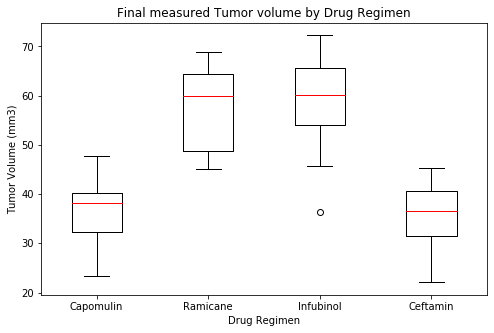

In [18]:
#Create a boxplot of the final tumor volume of each mouse for each drug regimen
fig1, ax1 = plt.subplots(figsize=(8,5))

#Set the title and labels
ax1.set_title("Final measured Tumor volume by Drug Regimen")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xticklabels(promising_regimens)
#Create a boxplot
ax1.boxplot([capomulin,ceftamin,infubinol,ramicane],boxprops=dict(color='black'), medianprops=dict(color='red'))


#Save the figure
plt.savefig("figures/boxplot.png")

#Display the chart
plt.show()

## Line and Scatter Plots

In [19]:
## Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Filter rows with Capomulin data, and filter two columns
capomulin_timepoint_df=combined_df.loc[(combined_df["Drug Regimen"]=="Capomulin"),["Timepoint","Tumor Volume (mm3)"]]
#Calculate the average tumor volume for each timepoint
capomulin_timepoint_summary_df=capomulin_timepoint_df.groupby(by="Timepoint").mean()
capomulin_timepoint_summary_df

,Tumor Volume (mm3)
Timepoint,
0,45.000000
5,44.266086
10,43.084291
15,42.064317
20,40.716325
25,39.939528
30,38.769339
35,37.816839
40,36.958001


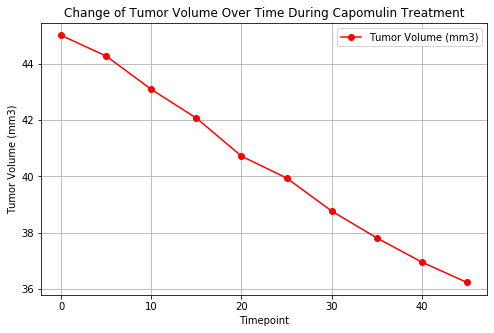

In [20]:
#Plot the line chart showing the tumor volume at each timepoint
capomulin_timepoint_summary_df.plot(kind='line', color='red', grid=True, marker="o",figsize=(8,5))

#Set the title and labels
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Change of Tumor Volume Over Time During Capomulin Treatment")

#Save the figure
plt.savefig("figures/line_chart.png")

#Display the chart
plt.show()

In [21]:
## Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Filter rows with Capomulin data, and filter two columns
capomulin_weight_df = combined_df.loc[(combined_df["Drug Regimen"]=="Capomulin"),["Weight (g)","Tumor Volume (mm3)"]]
#Group data by weight, calculate the average tumor volume for each weight
capomulin_weight_summary_df = capomulin_weight_df.groupby(by="Weight (g)").mean().reset_index()
capomulin_weight_summary_df

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


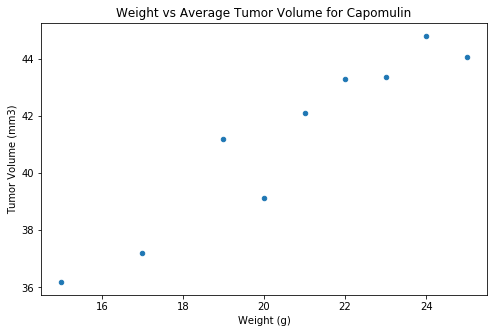

In [22]:
#Plot the scatter chart showing the correlation between weight(g) and tumor volume (mm3)
capomulin_weight_summary_df.plot(kind='scatter', x="Weight (g)", y="Tumor Volume (mm3)",figsize=(8,5))
plt.title("Weight vs Average Tumor Volume for Capomulin")

#Save the figure
plt.savefig("figures/scatter_chart.png")

#Display the chart
plt.show()

## Correlation and Regression

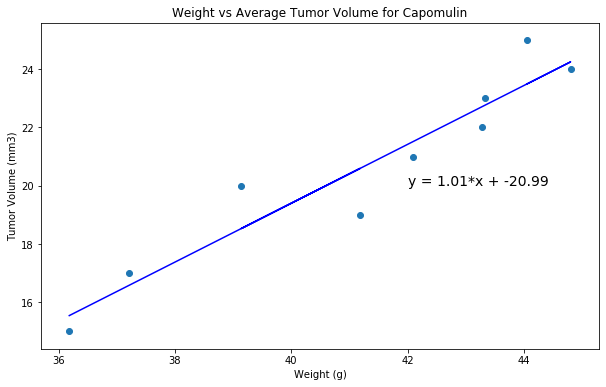

Linear regression model is y = 1.01*x + -20.99
Correlation coefficient between mouse weight and tumor volumes is 0.95


In [24]:
## Calculate the correlation coefficient and linear regression model 
## for mouse weight and average tumor volume for the Capomulin regimen

#Set x and y values
x_value = capomulin_weight_summary_df["Tumor Volume (mm3)"]
y_value = capomulin_weight_summary_df["Weight (g)"]

#Calculate the linear regression values
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(x_value, y_value)

#Set up the linear equation
regress = slope*x_value + intercept
lin_equation= f"y = {round(slope,2)}*x + {round(intercept,2)}"

#Plot the line chart showing the linear equation
plt.figure(figsize=(10,6))
plt.plot(x_value, regress, color="blue")
#Annotate the linear equation and correlation coefficient
plt.annotate(lin_equation,(42,20), fontsize=14)

#Plot the scatter chart showing the correlation between x and y
plt.scatter(x_value, y_value)

#Set the title and labels
plt.title("Weight vs Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

#Save the figure
plt.savefig("figures/regression.png")

#Display the chart
plt.show()

#Print out the linear regression equation
print(f"Linear regression model is {lin_equation}")
#Print out the correlation coefficient
print(f"Correlation coefficient between mouse weight and tumor volumes is {round(rvalue,2)}")